In [23]:
import math
import numpy as np
import matplotlib.pyplot as plt

$\large\textbf{Exercise_0:}$ 

$The \ loss \ functions \ are \ following:$ \
    \\
$ L_h(y_i, w^Tx_i) = \text{max}\{0, 1 - y_iw^Tx_i\} \  \ (hinge)$ \
$ L_l(y_i, w^Tx_i) = \text{log}(1 + exp(-y_iw^Tx_i)) \  \ (logistic)$ \
$ L_{sh}(y_i, w^Tx_i) = \text{(max}\{0, 1 - y_iw^Tx_i\})^2 \   \ (squared \ hinge)$

Now, \
 Assume   $\ z = y_iw^Tx_i$   and we have : 



$G_h(z) = \text{max}\{0,1 - z\}$  (hinge)

$G_l(z) = \text{log}(1 + exp(-z))$  (logistic)

$G_{sh}(z) = (\text{max}\{0,1 - z\})^2$  (squared hinge)


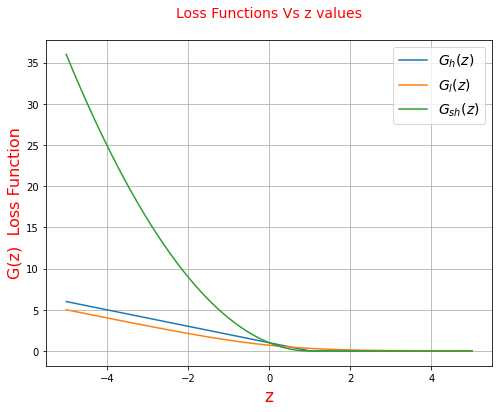

In [24]:
## Plotting the Loss Functions
plt.figure(figsize=(8,6))
z_values = np.linspace(-5, 5, 1000)
G_h = [max(0, 1-z) for z in z_values]
G_l = [math.log(1 + math.exp(-z)) for z in z_values]
G_sh = [(max(0, 1-z))**2 for z in z_values]
plt.plot(z_values, G_h ,label=r'$ $')
plt.plot(z_values, G_l,label= r'$ $') 
plt.plot(z_values, G_sh,label= r'$ $') 
plt.grid()
plt.title('Loss Functions Vs z values\n',fontsize=14, color = 'r')
plt.xlabel(r'z',fontsize=17, color='r')
plt.ylabel(r'G(z)  Loss Function',fontsize=16, color = 'r')
plt.legend(["$G_h(z)$", "$G_l(z)$", "$G_{sh}(z)$"],fontsize=14)
plt.show()

$\large\textbf{Exercise_1: Data Preparation}$

In [25]:
import numpy as np

In [26]:
#we will load the iris data from scikit-learn package
from sklearn.datasets import load_iris
iris = load_iris()
#check the shape of iris data
print(iris.data.shape)
A = iris.data
#check the shape of iris target
print(iris.target.shape)
print(iris.target)
#How many labels does iris data have?
#C=num_of_classes
#print(C)
n = iris.data.shape[0] #Number of data points
d = iris.data.shape[1] #Dimension of data points
#In the following code, we create a nx1 vector of target labels
y = 1.0*np.ones([A.shape[0],1])
for i in range(iris.target.shape[0]):
  # y[i] = ???? # Convert class labels that are not 1 into -1
  if iris.target[i] != 1:
    y[i] = -1
#Create an index array
indexarr = np.arange(n) #index array
np.random.shuffle(indexarr) #shuffle the indices

#check indexarr after shuffling
#Use the first 80% of indexarr to create the train data and the remaining 20% to create the test data
train_data = [] ; train_label = [] ; test_data = [] ; test_label = []
count = 1
for i in indexarr:
  if count <= int(0.8*n):
    train_data.append(list(A[i]))
    train_label.append(list(y[i]))
  else:
    test_data.append(list(A[i]))
    test_label.append(list(y[i]))
  count += 1
train_data = np.array(train_data) ; train_label = np.array(train_label)

test_data = np.array(test_data) ; test_label = np.array(test_label)

(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


**1.(a) >> Here, Number of classes $C $ is 3 and the class label values in the iris data are $0, 1, and \ 2$.** \
 **Also class labels are from the set {0,1,....,$C-1$} i.e. {0,1,2}**

$\Large\textbf{1.d}$ : Function implementing the prediction rule in **eqn. (2)**

In [27]:
def predict(w,x):
  a = np.matmul(w.T, x)  
  if a > 0:
    return 1
  elif  a < 0:
    return -1

$\Large\textbf{1.e _ Question:}$  \
Write a python function which takes as input the model parameter $w$, data features and
labels and returns the accuracy on the data. (Use the predict function).

In [28]:
def compute_accuracy(data,labels,model_w):
  accuracy = 0
  n = len(data[0])
  for i in range(n):
    if predict(model_w, np.reshape(data[i], (np.shape(data)[1],1))) == labels[i]:
      accuracy += 1
  return accuracy/n
compute_accuracy(train_data, train_label, np.ones((4, 1)))

0.25

$\large\textbf{Exercise_2:  An Optimization Algorithm}$ \

$\large\textbf{1.Answer:}$ \
Now, \
The problem (1) can be written as:

\begin{align}
\min_w f(w)= \min_w \ \sum_{i=1}^{n} f_i (w)     
\end{align}

**where appropriate choice of  $f_i(w)$ is given as:** \\
\begin{align}
f_i(\mathbf{w}) = \frac{\lambda}{2n} \mathbf{w^Tw} + \frac{1}{n}\text{max}\{0, 1 - y_i \mathbf{w^T}\mathbf{x_i}\}
\end{align}

$\textbf{2.Answer:}$  \

Consider the loss function $L_h = \text{max}\{0, 1 - y_i \mathbf{w^T}\mathbf{x_i}\}  \   \ (hinge)$.

In [29]:
#a python module to compute the loss function Lh.
def compute_loss_h(w,x,y):
  k = 1 - np.dot(w, x) * y
  return max(0, k)

$\textbf{3.Answer:}$

In [30]:
def compute_objfnval(data,labels,model_w):
  a = 0
  n = len(data[0])
  for i in range(n):
    a  += max(0, 1 - labels[i]* np.dot(data[i] ,model_w)) + 1/(2*n) * lamda * np.matmul(model_w.T, model_w)
  return a

$\textbf{4.Answer:}$

In [31]:
def compute_grad_loss_h(x,y,model_w):
  a = []
  x = x.reshape(1,4)
  if 0 < 1 - y* np.matmul(x ,model_w):
    a = [i[0] - j[0] for i in np.multiply(lamda, model_w) for j in np.multiply(y, x)]
  else:
    a = np.multiply(lamda, model_w)
  return a[0]

$\textbf{5.Answer:}$

In [32]:
def OPT1(data,label,lamda, num_epochs):
  t = 1
  w = np.ones((np.shape(data)[1], 1))
  arr = np.arange(data.shape[0])
  fval_array = []
  test_set_accuracy_array = []
  train_set_accuracy_array = []
  for epoch in range(num_epochs):
    np.random.shuffle(arr) #shuffle every epoch
    for i in np.nditer(arr): #Pass through the data points
      step = 1/(t)
      w = np.subtract(w , step * compute_grad_loss_h(data[i], label[i], w))
      t = t+1
    if epoch % 1 == 0:
      fval_array.append(compute_objfnval(data,label,w))
      test_set_accuracy_array.append(compute_accuracy(test_data,label,w))
      train_set_accuracy_array.append(compute_accuracy(train_data,label,w))

  return w, fval_array, test_set_accuracy_array, train_set_accuracy_array

$\textbf{6.Answer:}$

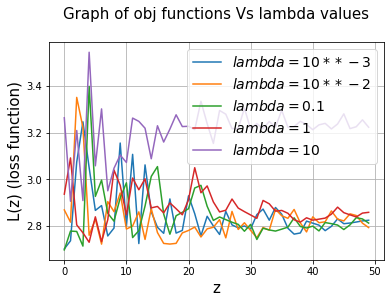

In [33]:
num_epochs = 1000
lambda_arr = [10**-3,10**-2,0.1,1,10]
data = train_data
label = train_label
for lamda in lambda_arr:
  w, fval_array, test_set_accuracy_array, train_set_accuracy_array = OPT1(data,label,lamda, num_epochs)
  new_fval_arr = []
  for i in range(50):
    new_fval_arr.append(list(fval_array[i][0]))
  plt.plot( new_fval_arr,label= r'$ $') 
plt.grid()
plt.title('Graph of obj functions Vs lambda values\n',fontsize=15)
plt.xlabel(r'z',fontsize=15)
plt.ylabel(r'L(z) (loss function)',fontsize=15)
plt.legend(["$lambda=10**-3$", "$lambda=10**-2$", "$lambda=0.1$", "$lambda=1$","$lambda=10$"],fontsize=14)
plt.show()

In [34]:
new_fval_arr = []
for i in range(50):
  new_fval_arr.append(list(fval_array[i][0]))


In [35]:
new_fval_arr

[[3.2645363912326752],
 [2.9063149327238817],
 [3.209940393013121],
 [2.909318253522436],
 [3.545841331352019],
 [3.0584717958560255],
 [3.3026986267430014],
 [2.9512147679033163],
 [3.047859662042404],
 [3.1045047693337895],
 [3.072821987106547],
 [3.263300226286679],
 [3.249304605443158],
 [3.2198068224653644],
 [3.088729149154718],
 [3.2303792873248667],
 [3.160559065122659],
 [3.2159420127846343],
 [3.2773480335134844],
 [3.2269340567261766],
 [3.228015389482585],
 [3.2139228963772837],
 [3.3352534190581133],
 [3.2395509807594367],
 [3.1546256490281004],
 [3.2959324596335042],
 [3.2800082067390903],
 [3.2181542321027528],
 [3.218587733884635],
 [3.305817071198722],
 [3.2155322914548274],
 [3.240058141539835],
 [3.21779353013096],
 [3.248625214103477],
 [3.2245297900369714],
 [3.296992274911459],
 [3.2237352688962067],
 [3.2270092383290923],
 [3.2494041318883955],
 [3.2358265976474363],
 [3.213506892415645],
 [3.234192405367307],
 [3.2406573277294375],
 [3.2168228861102786],
 [3.238

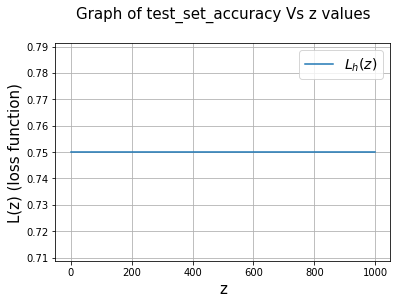

In [36]:

plt.plot( test_set_accuracy_array ,label=r'$ $')

plt.grid()
plt.title('Graph of test_set_accuracy Vs z values\n',fontsize=15)
plt.xlabel(r'z',fontsize=15)
plt.ylabel(r'L(z) (loss function)',fontsize=15)
plt.legend(["$L_h(z)$", "$L_l(z)$", "$L_{sh}(z)$"],fontsize=14)
plt.show()

NameError: ignored

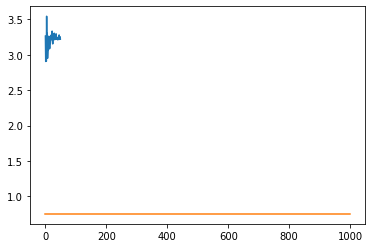

In [37]:
plt.plot( new_fval_arr,label= r'$ $') 
plt.plot( test_set_accuracy_array ,label=r'$ $')
plt.plot(lambda_arr, L_sh,label= r'$ $') 
plt.grid()
plt.title('Graph of loss functions Vs z values\n',fontsize=15)
plt.xlabel(r'z',fontsize=15)
plt.ylabel(r'L(z) (loss function)',fontsize=15)
plt.legend(["$L_h(z)$", "$L_l(z)$", "$L_{sh}(z)$"],fontsize=14)
plt.show()